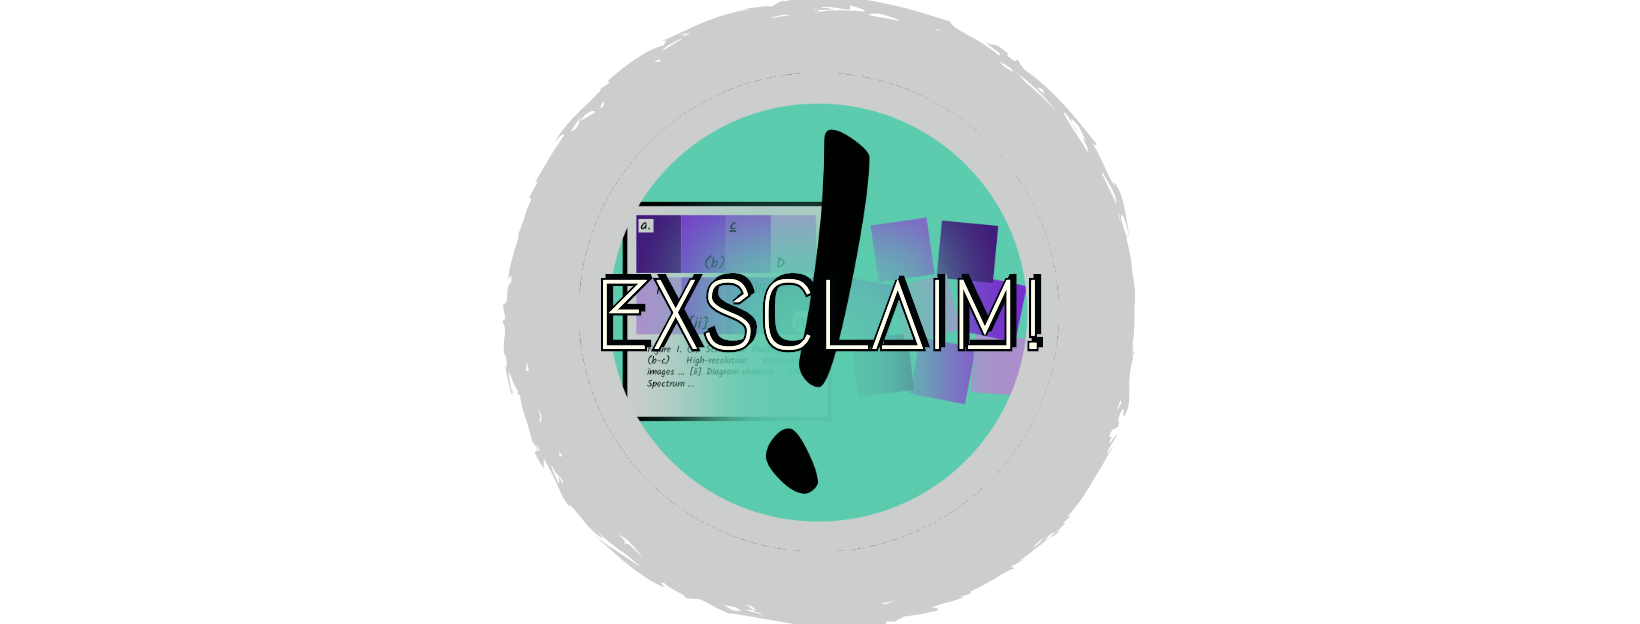

# 1. Install EXSCLAIM! code and dependencies





In [ ]:
!git clone -b javascript_fixes https://github.com/katerinavr/exsclaim.git
%cd exsclaim
!pip install itables
!python setup.py install
!pip install urllib3==1.25.10
!pip install --upgrade --no-cache-dir gdown
from IPython.display import clear_output
import pandas as pd

clear_output()

# 2. Import the pretrained models

In [ ]:
#import requests
import os

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?id="+id
    cmd = "gdown %s -O %s"%(URL, destination)
    os.system(cmd)

In [ ]:
# Load the pretrained models
!mkdir /content/exsclaim/exsclaim/figures/checkpoints/
download_file_from_google_drive('1ZodeH37Nd4ZbA0_1G_MkLKuuiyk7VUXR', '/content/exsclaim/exsclaim/figures/checkpoints/classifier_model.pt')
download_file_from_google_drive('1Hh7IPTEc-oTWDGAxI9o0lKrv9MBgP4rm', '/content/exsclaim/exsclaim/figures/checkpoints/object_detection_model.pt')
download_file_from_google_drive('1rZaxCPEWKGwvwYYa8jLINpUt20h0jo8y', '/content/exsclaim/exsclaim/figures/checkpoints/text_recognition_model.pt')
download_file_from_google_drive('1B4_rMbP3a1XguHHX4EnJ6tSlyCCRIiy4', '/content/exsclaim/exsclaim/figures/checkpoints/scale_bar_detection_model.pt')
download_file_from_google_drive('1oGjPG698LdSGvv3FhrLYh_1FhcmYYKpu', '/content/exsclaim/exsclaim/figures/checkpoints/scale_label_recognition_model.pt')

# 3. Setting up your query json file

Below you can find an example of the json query which is the input to the pipeline. Several example queries can be found under: /exsclaim/query

```
# Creating the query json file

 {    "name": "acs-nano",
    "journal_family": "acs",
    "maximum_scraped": 2,
    "sortby": "relevant",
    "query":
    { "search_field_1":
        {   "term":"nano",
            "synonyms":["nanoparticle"] } },
    "open": true,
    "save_format": ["boxes"],
    "logging": ["print", "exsclaim.log"] }

```
*   **name**: the name of the folder to save the files
*   **journal_family**: select among Nature, ACS, RSC, Wiley
*   **maximum_scraped**: define the number of papers to scrap data from
*   **query**: set the names and synonims of the search
*   **open**: is open access
*   **save format**:
                "boxes" --> draw bounding boxes
                "visualization" --> save subfigures with their labels
                "csv" --> save the extracted data in csv
*   **logging**: "print" --> print the events when exsclaim runs





In [ ]:
test_json =  {
    "name": "nature-nano",

    "journal_family": "nature",

    "maximum_scraped": 3,

    "sortby": 'relevant',

    "query":

    { "search_field_1":

        {   "term":"Ag nanoparticle",

            "synonyms":["Ag nanoparticles", "silver nanoparticle", "silver nanoparticle", "nanoparticles of silver", "AgNPs", "AgNP", "Ag NPs", "silver NPs", "silver NP"] } },

    "open": True,

    "save_format": ["boxes", "save_subfigures" ],

    "logging": ["print", "exsclaim.log"]
    }

# 4. Run EXSCLAIM! to scrap data from Nature

Once the run is completed successfully a **SUCCESS** message will be printed.
Inside the exsclaim directory the generated documents can be located into the /exsclaim/output/name

- Nature journal example






Wait until the SUCCESS message is printed!

In [ ]:
from exsclaim import journal
from exsclaim import pipeline
from exsclaim import tool

In [ ]:
from exsclaim.pipeline import Pipeline
test_pipeline = Pipeline(test_json)
results = test_pipeline.run()


        @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
        @@@@@@@@@@@@@@@@@@@&   /&@@@(   /@@@@@@@@@@@@@@@@@@@
        @@@@@@@@@@@@@@@ %@@@@@@@@@@@@@@@@@@@ *@@@@@@@@@@@@@@
        @@@@@@@@@@@@ @@@@@@@@@@@@@@,  .@@@@@@@@ *@@@@@@@@@@@
        @@@@@@@@@.#@@@@@@@@@@@@@@@@,    @@@@@@@@@@ @@@@@@@@@
        @@@@@@@&,@@@@@@@@@@@@@@@@@@.    @@@@@@@@@@@@ @@@@@@@
        @@@@@@ @@@@@@@@@@@@@@@@@@@@     @@@@@@@@@@@@@ @@@@@@
        @@@@@ @@@@@@@@@@@@@@@@@@@@@    *@@@@@@@@@@@@@@/@@@@@
        @@@@ @@@@@@@@@@@@@@@@@@@@@@    @@@@@@@@@@@@@@@@,@@@@
        @@@ @@@@@@@@@@@@@@@@@@@@@@&    @@@@@@@@@@@@@@@@@ @@@
        @@@,@@@@@@@@@@@@@@@@@@@@@@*   (@@@@@@@@@@@@@@@@@@%@@
        @@.@@@@@@@@@@@@@@@@@@@@@@@    @@@@@@@@@@@@@@@@@@@ @@
        @@ @@@@@@@@@@@@@@@@@@@@@@@    @@@@@@@@@@@@@@@@@@@ @@
        @@ @@@@@@@@@@@@@@@@@@@@@@/   &@@@@@@@@@@@@@@@@@@@ @@
        @@,@@@@@@@@@@@@@@@@@@@@@@    @@@@@@@@@@@@@@@@@@@@ @@
        @@@.@@@@@@@@@@@@@@@@@@@@&   @@@@@@@@@@@@@@@@@@@@@%@@
        @@@ @@@@@@@@@@@

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 300MB/s]


Running Journal Scraper
>>> Time Elapsed: 60.48 sec (3 articles)
Running Caption Distributor
>>> Time Elapsed: 16.57 sec (19 captions)
Running Figure Separator
>>> Time Elapsed: 105.91 sec (19 figures)
Matching Image Objects to Caption Text
>>> SUCCESS!
Printing Master Image Objects to: /content/exsclaim/output/nature-nano/images
>>> SUCCESS!


# 5. Visualize the results

Here is a visuallization of the first extracted image

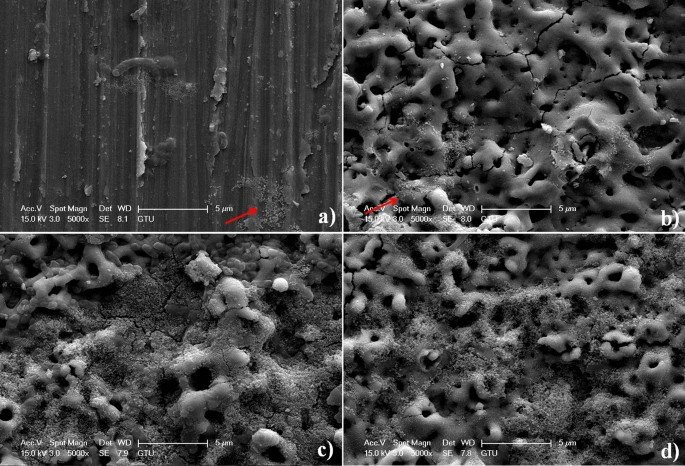

In [ ]:
#visualize extracted images and dataset with captions
from google.colab.patches import cv2_imshow
import cv2
import os
import random

folder_path = '/content/exsclaim/output/nature-nano/figures/'
png_files = [f for f in os.listdir(folder_path ) if f.endswith('.jpg')]
image = random.choice(png_files)
img = cv2.imread(os.path.join(folder_path , image))
cv2_imshow(img)

We can also see the extracted subfigures

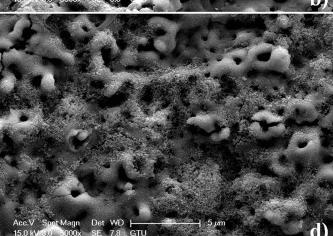

In [ ]:
def plot_subfigure(label):
  dir_path = f"/content/exsclaim/output/nature-nano/images/{image.split('.')[0]}/{label}/"
  files = os.listdir(dir_path)
  image_files = [f for f in files if f.startswith(f"{image.split('.')[0]}_{label}") and f.endswith('.jpg')][0]
  img = cv2.imread(os.path.join(dir_path, image_files))
  return cv2_imshow(img)

plot_subfigure('b')

The generated dataset with the image captions and the image information can be show below

In [ ]:
from exsclaim.visualize_dataset import *
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

df = read_jsons('/content/exsclaim/output/nature-nano/exsclaim.json')
display(df)

name  \
0    s41598-023-33992-5_fig1.jpg   
1    s41598-023-33992-5_fig2.jpg   
2    s41598-023-33992-5_fig3.jpg   
3    s41598-023-33992-5_fig4.jpg   
4    s41598-023-33992-5_fig5.jpg   
5    s41598-023-33992-5_fig6.jpg   
6    s41598-023-33992-5_fig7.jpg   
7    s41598-023-33992-5_fig8.jpg   
8    s41598-023-33992-5_fig9.jpg   
9   s41598-023-33992-5_fig10.jpg   
10   s41467-022-31275-7_fig1.jpg   
11   s41467-022-31275-7_fig2.jpg   
12   s41467-022-31275-7_fig3.jpg   
13   s41467-022-31275-7_fig4.jpg   
14   s41467-023-35981-8_fig1.jpg   
15   s41467-023-35981-8_fig2.jpg   
16   s41467-023-35981-8_fig3.jpg   
17   s41467-023-35981-8_fig4.jpg   
18   s41467-023-35981-8_fig5.jpg   

                                                title  \
0   Characterization and investigation of biologic...   
1   Characterization and investigation of biologic...   
2   Characterization and investigation of biologic...   
3   Characterization and investigation of biologic...   
4   Characterization and investigation of biologic...   
5   Characterization and investigation of biologic...   
6   Characterization and investigation of biologic...   
7   Characterization and investigation of biologic...   
8   Characterization and investigation of biologic...   
9   Characterization and investigation of biologic...   
10  Breaking the nanoparticle’s dispersible limit ...   
11  Breaking the nanoparticle’s dispersible limit ...   
12  Breaking the nanoparticle’s dispersible limit ...   
13  Breaking the nanoparticle’s dispersible limit ...   
14  Silver nanoparticle enhanced metal-organic mat...   
15  Silver nanoparticle enhanced metal-organic mat...   
16  Silver nanoparticle enhanced metal-organic mat...   
17  Silver nanoparticle enhanced metal-organic mat...   
18  Silver nanoparticle enhanced metal-organic mat...   

                                          article_url        article_name  \
0   https://www.nature.com/articles/s41598-023-339...  s41598-023-33992-5   
1   https://www.nature.com/articles/s41598-023-339...  s41598-023-33992-5   
2   https://www.nature.com/articles/s41598-023-339...  s41598-023-33992-5   
3   https://www.nature.com/articles/s41598-023-339...  s41598-023-33992-5   
4   https://www.nature.com/articles/s41598-023-339...  s41598-023-33992-5   
5   https://www.nature.com/articles/s41598-023-339...  s41598-023-33992-5   
6   https://www.nature.com/articles/s41598-023-339...  s41598-023-33992-5   
7   https://www.nature.com/articles/s41598-023-339...  s41598-023-33992-5   
8   https://www.nature.com/articles/s41598-023-339...  s41598-023-33992-5   
9   https://www.nature.com/articles/s41598-023-339...  s41598-023-33992-5   
10  https://www.nature.com/articles/s41467-022-312...  s41467-022-31275-7   
11  https://www.nature.com/articles/s41467-022-312...  s41467-022-31275-7   
12  https://www.nature.com/articles/s41467-022-312...  s41467-022-31275-7   
13  https://www.nature.com/articles/s41467-022-312...  s41467-022-31275-7   
14  https://www.nature.com/articles/s41467-023-359...  s41467-023-35981-8   
15  https://www.nature.com/articles/s41467-023-359...  s41467-023-35981-8   
16  https://www.nature.com/articles/s41467-023-359...  s41467-023-35981-8   
17  https://www.nature.com/articles/s41467-023-359...  s41467-023-35981-8   
18  https://www.nature.com/articles/s41467-023-359...  s41467-023-35981-8   

                                            image_url  \
0   https://media.springernature.com/lw685/springe...   
1   https://media.springernature.com/lw685/springe...   
2   https://media.springernature.com/lw685/springe...   
3   https://media.springernature.com/lw685/springe...   
4   https://media.springernature.com/lw685/springe...   
5   https://media.springernature.com/lw685/springe...   
6   https://media.springernature.com/lw685/springe...   
7   https://media.springernature.com/lw685/springe...   
8   https://media.springernature.com/lw685/springe...   
9   https://media.springernature.com/lw685/springe...  

# Named entity recognition

- Now given the extracted captions, we can extract the named entities
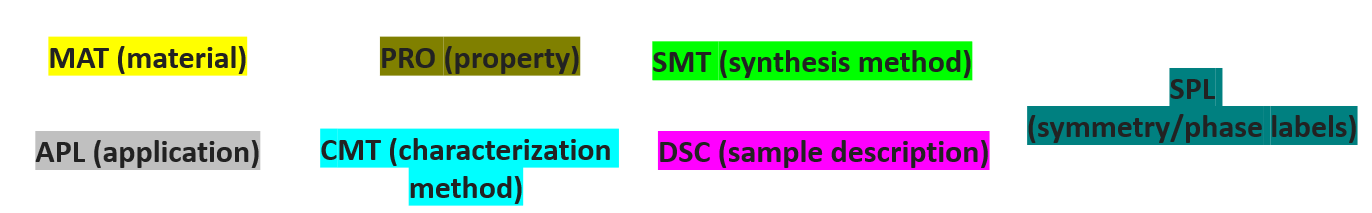

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!pip3 install openai
!pip3 install promptify
clear_output()

In [ ]:
#@title run the  to get the openAI API_key
from IPython.display import HTML
from promptify import OpenAI
from promptify import Prompter
import ast

api_key  = "" # use your API key
model = OpenAI(api_key)
nlp_prompter = Prompter(model)

one_shot = "The application of graphene and its composites in oxygen reduction electrocatalysis: a perspective and review of recent progress The pressing necessity of a sustainable energy economy renders electrochemical energy conversion technologies, such as polymer electrolyte fuel cells or metal \u2013 air batteries, of paramount importance . The implementation of these technologies at scale still faces cost and operational durability challenges that stem from the conventionally used oxygen reduction reaction (ORR) electrocatalysts . While years of progress in ORR catalyst research has yielded some very attractive material designs, further advances are still required . Graphene entered the picture over 10 years ago, and scientists have only recently achieved a level of understanding regarding how its specific properties can be fine - tuned for electrocatalyst applications . This paper provides a critical review of the knowledge generated and progress realized over these past years for the development of graphene - based ORR catalysts . The first section discusses the application potential of graphene or modified graphene as platinum nanoparticle catalyst supports . The second section discusses the important role that graphene has played in the development of non-precious metal ORR catalysts, and more particularly its role in pyrolyzed transition metal \u2013 nitrogen \u2013 carbon complexes or as a support for inorganic nanoparticles . Finally the development of heteroatom doped graphene species is discussed, as this has been demonstrated as an excellent method to fine - tune the physicochemical properties and induce catalytic activity . Throughout this paper, clear differentiation is made between acidic and alkaline ORR catalysts, and some common misconceptions or improper testing practices used throughout the literature are revealed . Synthesis strategies and how they pertain to the resulting structure and electrochemical performance of graphene are discussed . In light of the large body of work done in this area, specific strategies are suggested for perpetuating the advancement of graphene - based ORR electrocatalysts . With concerted efforts it is one day likely that graphene - based catalysts will be a staple of electrochemical energy systems."
three_shot="Electrical properties of ceria - based oxides and their application to solid oxide fuel cells Ionic conductivities of ceria-alkaline-earth and -rare-earth oxide systems were investigated in relation to their structures, electrical conductivities, and reducibilities . Samaria and gadolinia - doped ceria samples exhibited the highest electrical conductivity in ceria - based oxides because of the close ionic radii of Sm3+ and Gd3+ to that of Ce4+ . The ionic conductivity of samaria- doped ceria was also measured by an ac four - probe method with electron blocking electrodes . A solid oxide fuel cell with a samaria ceria electrolyte produced high electric power, because of its highest oxygen ionic conductivity . The reduction of ceria electrolyte at the fuel side could be suppressed by a coating of stabilized zirconia thin film on the ceria surface . The anodic overvoltage of the doped ceria / anode interface was very small."
few_shot = [[one_shot, [ {"E": "electrochemical", "T": "applications"}, {"E": "catalysts", "T": "applications"}, {"E": "structure", "T": "material properties"}, {"E": "electrocatalyst", "T": "applications"}, {"E": "reduction", "T": "applications"}, {"E": "polymer", "T": "applications"}, {"E": "performance", "T": "material properties"}, {"E": "electrolyte", "T": "applications"}, {"E": "fuel", "T": "applications"}, {"E": "batteries", "T": "applications"}, {"E": "graphene", "T": "inorganic materials"}, {"E": "applications", "T": "applications"}, {"E": "durability", "T": "material properties"}, {"E": "platinum", "T": "inorganic materials"}, {"E": "activity", "T": "material properties"}, {"E": "reaction", "T": "applications"}, {"E": "catalyst","T": "applications"}, {"E": "electrocatalysts", "T": "applications"}, {"E": "nanoparticles", "T": "sample descriptors"}, {"E": "metal", "T": "applications"}, {"E": "composites", "T": "sample descriptors"}, {"E": "catalytic", "T": "material properties"}, {"E": "electrocatalysis", "T": "applications"}, {"E": "oxygen", "T": "applications"}, {"E": "conversion", "T": "applications"}, {"E": "carbon", "T": "inorganic materials"}, {"E": "doped", "T": "sample descriptors"}, {"E": "Graphene", "T": "inorganic materials"}, {"E": "air", "T": "applications"}, {"E": "(", "T": "applications"}, {"E": "systems", "T": "applications"}, {"E": "physicochemical", "T": "material properties"}, {"E": "energy", "T": "applications"}, {"E": "electrochemical", "T": "material properties"}, {"E": "technologies", "T": "applications"}, {"E": "cells", "T": "applications"}, {"E": "nanoparticle", "T": "sample descriptors"}, {"E": "properties", "T": "material properties"}, {"E": "ORR", "T": "applications"}, {"E": "\u2013", "T": "applications"}]],
            [three_shot, [{"E": "probe", "T": "characterization methods"}, {"E": "blocking", "T": "material applications"}, {"E": "ionic", "T": "material properties"}, {"E": "anode", "T": "material applications"}, {"E": "structures", "T": "material properties"}, {"E": "cell", "T": "material applications"}, {"E": "reducibilities", "T": "material properties"}, {"E": "surface", "T": "sample descriptors"}, {"E": "film", "T": "sample descriptors"}, {"E": "four", "T": "characterization methods"}, {"E": "oxide", "T": "inorganic materials"}, {"E": "electrolyte", "T": "material applications"}, {"E": "interface", "T": "sample descriptors"}, {"E": "overvoltage", "T": "material properties"}, {"E": "ceria", "T": "inorganic materials"}, {"E": "fuel", "T": "material applications"}, {"E": "ac", "T": "characterization methods"}, {"E": "solid", "T": "material applications"}, {"E": "samaria-", "T": "inorganic materials"}, {"E": "power", "T": "material properties"}, {"E": "oxides", "T": "inorganic materials"}, {"E": "Samaria", "T": "inorganic materials"}, {"E": "oxygen", "T": "material properties"}, {"E": "rare-earth", "T": "inorganic materials"}, {"E": "electric", "T": "material properties"}, {"E": "coating", "T": "material applications"}, {"E": "zirconia", "T": "inorganic materials"}, {"E": "conductivity", "T": "material properties"}, {"E": "electron", "T": "material applications"}, {"E": "electrical", "T": "material properties"}, {"E": "samaria", "T": "inorganic materials"}, {"E": "Electrical", "T": "material properties"}, {"E": "doped", "T": "sample descriptors"},{"E": "gadolinia", "T": "inorganic materials"}, {"E": "Ionic", "T": "material properties"}, {"E": "ceria-alkaline-earth", "T": "inorganic materials"}, {"E": "oxide", "T": "material applications"}, {"E": "cells", "T": "material applications"}, {"E": "conductivities", "T": "material properties"}, {"E": "electrodes", "T": "material applications"}, {"E": "thin", "T": "sample descriptors"}, {"E": "properties", "T": "material properties"}, {"E": "anodic", "T": "material properties"}, {"E": "method", "T": "characterization methods"}]]
            ]

def exsclaim_ner(caption):
  result = nlp_prompter.fit('ner.jinja',
                            domain      = 'solid state materials science',
                            text_input  = caption,
                            examples    = few_shot,
                            description = "Extract only entities related to solid state materials science and ignore all the other entities. Only one single word is allowed for each key as in the example. The entities should match exactly with the text.",
                            labels      = ["inorganic materials", "symmetry/phase labels", "sample descriptors", "material properties", "material applications", "synthesis methods", "characterization methods"] )
  data = ast.literal_eval(result['text'])

  # create an empty dictionary to hold the grouped values
  grouped_data = {"inorganic materials": [], "symmetry/phase labels": [], "sample descriptors": [], "material properties": [], "material applications": [], "synthesis methods": [], "characterization methods": []}
  labels = ["inorganic materials", "symmetry/phase labels", "sample descriptors", "material properties", "material applications", "synthesis methods", "characterization methods"]

  # loop over the dictionaries in the list
  for d in data[0]:
      # get the value of the 'T' key
      key = d['T']
      # get the value of the 'E' key
      value = d['E']
      # check if the key is already in the dictionary
      if key in grouped_data:
          # if it is, append the value to the existing list
          grouped_data[key].append(value)
      else:
          # if it's not, create a new list with the value
          grouped_data[key] = [value]

  # Add empty lists for the keys that are not in the data[0]
  for key in labels:
      if key not in grouped_data:
          grouped_data[key] = []

  text = caption
  yellow_words = grouped_data['inorganic materials']
  cyan_words = grouped_data['characterization methods']
  green_words = grouped_data['symmetry/phase labels']
  purple_words = grouped_data['sample descriptors']
  lightgreen_words = grouped_data['synthesis methods']
  grey_words = grouped_data['material applications']
  mustard_words = grouped_data['material properties']

  # Highlight the words in the text with HTML tags and different colors
  for word in yellow_words:
      text = text.replace(word, f"<span style='background-color: yellow'>{word}</span>")

  for word in cyan_words:
      text = text.replace(word, f"<span style='background-color: cyan'>{word}</span>")

  for word in green_words:
      text = text.replace(word, f"<span style='background-color: #0a888a'>{word}</span>")

  for word in purple_words:
      text = text.replace(word, f"<span style='background-color: magenta'>{word}</span>")

  for word in lightgreen_words:
      text = text.replace(word, f"<span style='background-color: lightgreen'>{word}</span>")

  for word in grey_words:
      text = text.replace(word, f"<span style='background-color: grey'>{word}</span>")

  for word in mustard_words:
      text = text.replace(word, f"<span style='background-color: #FFCC00'>{word}</span>")

  # Create an HTML string that displays the highlighted text
  html = f"<p>{text}</p>"

  # Display the HTML string in the notebook
  return html # display(HTML(html))


The identified entities are highlighted to the selected caption.

In [ ]:
html = exsclaim_ner(df.full_caption.values[1])
display(HTML(html))